### Query

In [1]:
import os

In [6]:
query = '?$filter=substringof(%2743SFR%27,Name) and Online eq true'
username = 'danyayay'
password = 'Ldy19970722'
output_doc = '../data/q.txt'

In [9]:
url_query = "https://scihub.copernicus.eu/dhus/odata/v1/Products" + query
cmd_query = f'wget --no-check-certificate --user={username} --password={password} --output-document={output_doc} "{url_query}"'
os.system(cmd_query)

0

### Download

In [18]:
id_ = '2c50ca48-661e-4163-ba0a-902c4811cf09' # offline

In [5]:
url = f"https://scihub.copernicus.eu/dhus/odata/v1/Products('{id_}')/$value"

In [6]:
os.system(f'wget --content-disposition --continue --user=danyayay --password=Ldy19970722 "{url}"')

0

In [19]:
url_online = f"https://scihub.copernicus.eu/dhus/odata/v1/Products('{id_}')/Online"

In [20]:
os.popen(f'wget --user=danyayay --password=Ldy19970722 "{url_online}"').read()

''

In [7]:
id_ = '0e37a78b-3b91-4c15-bef2-33c2082044a7' # online

In [8]:
url = f"https://scihub.copernicus.eu/dhus/odata/v1/Products('{id_}')/$value"

In [9]:
os.system(f'wget --content-disposition --continue --user=danyayay --password=Ldy19970722 "{url}"')

0

### Extract

In [36]:
with open('../data/output.txt') as f:
    lines = f.readlines()

In [46]:
query_data = ''
for l in lines:
    query_data += l

In [38]:
import re 

In [60]:
ids = re.findall('<m:properties><d:Id>(.*)</d:Id><d:Name>(.*)</d:Name>.*<d:Online>(.*)</d:Online>', query_data)

In [67]:
ids

[('e55ece38-f77a-4953-865b-d570c9997aa9',
  'S2B_MSIL2A_20210616T053639_N0300_R005_T43SFR_20210616T082742',
  'true'),
 ('5b4a6ce4-7356-4baf-974b-36335d49b367',
  'S2B_MSIL2A_20191211T053219_N0213_R105_T43SFR_20191211T085824',
  'true'),
 ('2c50ca48-661e-4163-ba0a-902c4811cf09',
  'S2A_MSIL1C_20200603T052651_N0209_R105_T43SFR_20200603T091952',
  'true'),
 ('923d53df-40d3-4df7-84c7-90d47fda5f5d',
  'S2A_MSIL1C_20210728T052651_N0301_R105_T43SFR_20210728T082347',
  'true'),
 ('8d30e360-13a5-48fe-94bc-7e746a420943',
  'S2B_MSIL2A_20210626T053639_N0300_R005_T43SFR_20210626T083628',
  'true'),
 ('9d8960ee-3882-4559-b055-4a86e94de2ba',
  'S2A_MSIL1C_20210621T053641_N0300_R005_T43SFR_20210621T075059',
  'true'),
 ('16241b12-cce4-4bf4-8e55-5a790134a1d0',
  'S2A_MSIL1C_20210807T052651_N0301_R105_T43SFR_20210807T073546',
  'true'),
 ('1b6a063d-c459-4696-8aad-1a7be0927959',
  'S2A_MSIL2A_20210621T053641_N0300_R005_T43SFR_20210621T084400',
  'true'),
 ('93b26afa-9d74-4cff-b647-a5b5e043b49e',
  'S2A

In [77]:
ids[-2][1]

'S2A_MSIL2A_20210529T052651_N0300_R105_T43SFR_20210529T075026'

In [75]:
ids[-1][1].startswith('S2A_MSIL1C_2021')

False

In [59]:
len(ids)

50

In [81]:
import os
print(os.listdir('N:/dataorg-datasets/sentinel2_images/images_danya/raw/'))

['S2A_MSIL1C_20210502T053641_N0300_R005_T43SFR_20210502T074642.zip', 'S2A_MSIL1C_20210509T052651_N0300_R105_T43SFR_20210509T074019.zip', 'S2A_MSIL1C_20201001T052651_N0209_R105_T43SFR_20201001T080756.zip', 'S2A_MSIL1C_20210412T053641_N0300_R005_T43SFR_20210412T070823.zip']


### unzip

In [8]:
import os
import zipfile

In [13]:
def unzip_products(raw_data_path, processed_data_path):
    for filename in ['q.zip', 'query.zip']:
        raw_file = raw_data_path + filename
        processed_file = processed_data_path + filename
        with zipfile.ZipFile(raw_file, 'r') as f:
            f.extractall(raw_data_path)

In [6]:
def process_data(images_path='./'):
    unzip_products(images_path, images_path)

In [14]:
process_data()

In [10]:
os.listdir('./')

['.ipynb_checkpoints', 'q.zip', 'query.zip', 'Untitled.ipynb']

### Correction

In [2]:
unzipped_data_path = 'N:/dataorg-datasets/sentinel2_images/images_danya/raw/'

In [1]:
import os, re

In [4]:
files = os.listdir(unzipped_data_path)

In [5]:
files

['S2A_MSIL1C_20200108T054221_N0208_R005_T43SFR_20200108T065352.zip',
 'S2A_MSIL1C_20200603T052651_N0209_R105_T43SFR_20200603T091952.zip',
 'S2A_MSIL1C_20201001T052651_N0209_R105_T43SFR_20201001T080756.zip',
 'S2A_MSIL1C_20210303T053731_N0209_R005_T43SFR_20210303T071456.zip',
 'S2A_MSIL1C_20210330T052641_N0300_R105_T43SFR_20210330T072750.zip',
 'S2A_MSIL1C_20210402T053641_N0300_R005_T43SFR_20210402T074229.zip',
 'S2A_MSIL1C_20210409T052641_N0300_R105_T43SFR_20210409T074750.zip',
 'S2A_MSIL1C_20210412T053641_N0300_R005_T43SFR_20210412T070823.zip',
 'S2A_MSIL1C_20210429T052641_N0300_R105_T43SFR_20210429T072359.zip',
 'S2A_MSIL1C_20210502T053641_N0300_R005_T43SFR_20210502T074642.zip',
 'S2A_MSIL1C_20210509T052651_N0300_R105_T43SFR_20210509T074019.zip',
 'S2A_MSIL1C_20210512T053641_N0300_R005_T43SFR_20210512T081347.zip',
 'S2A_MSIL1C_20210529T052651_N0300_R105_T43SFR_20210529T072625.zip',
 'S2A_MSIL1C_20210608T052651_N0300_R105_T43SFR_20210608T074116.zip',
 'S2A_MSIL1C_20210810T053641_N0301

In [8]:
[file for file in files if re.match('.*SAFE', file)]

[]

### download using `sentinelsat` packages

In [152]:
from sentinelsat import SentinelAPI

In [30]:
from sentinelsat import geojson_to_wkt

In [153]:
user = 'danyayay' 
password = 'empa.401' 
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [32]:
geojson_to_wkt(feature_collection)

'POLYGON((2.3800 57.3220,23.1940 -20.2800,-120.4300 19.1500,2.3800 57.3220))'

In [ ]:
polygon = geojson.Polygon([[(32.50, 76.10), 
                            (31.60, 76.10), 
                            (31.60, 77.10), 
                            (32.50, 77.10), 
                            (32.50, 76.10)]])
features = []
features.append(geojson.Feature(geometry=polygon, properties={"tile": "43SFR"}))
feature_collection = geojson.FeatureCollection(features)
feature_collection

In [154]:
polygon = geojson.Polygon([[(76.20, 32.40), 
                            (76.20, 31.70), 
                            (77.00, 31.70), 
                            (77.00, 32.40), 
                            (76.20, 32.40)]])
features = []
features.append(geojson.Feature(geometry=polygon, properties={"tile": "43SFR"}))
feature_collection = geojson.FeatureCollection(features)
feature_collection

{"features": [{"geometry": {"coordinates": [[[76.2, 32.4], [76.2, 31.7], [77.0, 31.7], [77.0, 32.4], [76.2, 32.4]]], "type": "Polygon"}, "properties": {"tile": "43SFR"}, "type": "Feature"}], "type": "FeatureCollection"}

In [155]:
footprint = geojson_to_wkt(polygon)

In [156]:
footprint

'POLYGON((76.2000 32.4000,76.2000 31.7000,77.0000 31.7000,77.0000 32.4000,76.2000 32.4000))'

In [162]:
products = api.query(date = ('20200101', '20200131'),
                      platformname = 'Sentinel-2',
                      processinglevel = 'Level-1C',
                      raw='tileid:43SFR',
                    )

In [164]:
len(products)

12

In [165]:
products

OrderedDict([('ff11dbc5-a2a9-4d37-ab10-dcc72d6ac75f',
              {'title': 'S2B_MSIL1C_20200130T053049_N0208_R105_T43SFR_20200130T090639',
               'link': "https://scihub.copernicus.eu/dhus/odata/v1/Products('ff11dbc5-a2a9-4d37-ab10-dcc72d6ac75f')/$value",
               'link_alternative': "https://scihub.copernicus.eu/dhus/odata/v1/Products('ff11dbc5-a2a9-4d37-ab10-dcc72d6ac75f')/",
               'link_icon': "https://scihub.copernicus.eu/dhus/odata/v1/Products('ff11dbc5-a2a9-4d37-ab10-dcc72d6ac75f')/Products('Quicklook')/$value",
               'summary': 'Date: 2020-01-30T05:30:49.024Z, Instrument: MSI, Satellite: Sentinel-2, Size: 731.54 MB',
               'ondemand': 'false',
               'datatakesensingstart': datetime.datetime(2020, 1, 30, 5, 30, 49, 24000),
               'beginposition': datetime.datetime(2020, 1, 30, 5, 30, 49, 24000),
               'endposition': datetime.datetime(2020, 1, 30, 5, 30, 49, 24000),
               'ingestiondate': datetime.datet

In [170]:
for p_id in products.keys():
    p_info = api.get_product_odata(p_id)
    print(p_info['title'], p_info['Online'])

S2B_MSIL1C_20200130T053049_N0208_R105_T43SFR_20200130T090639 False
S2A_MSIL1C_20200128T054101_N0208_R005_T43SFR_20200128T073349 True
S2A_MSIL1C_20200125T053101_N0208_R105_T43SFR_20200125T072309 True
S2B_MSIL1C_20200123T054129_N0208_R005_T43SFR_20200123T091727 True
S2B_MSIL1C_20200120T053129_N0208_R105_T43SFR_20200120T080830 False
S2A_MSIL1C_20200118T054151_N0208_R005_T43SFR_20200118T065457 False
S2A_MSIL1C_20200115T053151_N0208_R105_T43SFR_20200115T064900 False
S2B_MSIL1C_20200113T054209_N0208_R005_T43SFR_20200113T083509 False
S2B_MSIL1C_20200110T053209_N0208_R105_T43SFR_20200110T080722 False
S2A_MSIL1C_20200108T054221_N0208_R005_T43SFR_20200108T065352 False
S2A_MSIL1C_20200105T053221_N0208_R105_T43SFR_20200105T072254 False
S2B_MSIL1C_20200103T054229_N0208_R005_T43SFR_20200103T081659 False


In [169]:
p_info

{'id': '59424b93-a7d3-4d13-a8ed-622f67af2f76',
 'title': 'S2B_MSIL1C_20200103T054229_N0208_R005_T43SFR_20200103T081659',
 'size': 733659753,
 'md5': '6F1E08D5EF185FD5F537CEB92801FB6E',
 'date': datetime.datetime(2020, 1, 3, 5, 42, 29, 24000),
 'footprint': 'POLYGON((77.10993195243533 32.519140060226434,77.07156642125315 32.39734378956862,77.02816374128174 32.24988950754003,76.98624017034963 32.102051269444665,76.94557846683662 31.95391932160098,76.9172126458552 31.85142072930894,76.90438949287612 31.805275114171,76.86067980281646 31.658062609740377,76.84938196211557 31.62103331669963,76.82237551156545 31.53261597826942,76.05347599928324 31.54242728634164,76.06487986420782 32.532846626599884,77.10993195243533 32.519140060226434))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('59424b93-a7d3-4d13-a8ed-622f67af2f76')/$value",
 'Online': False,
 'Creation Date': datetime.datetime(2020, 1, 3, 10, 25, 19, 145000),
 'Ingestion Date': datetime.datetime(2020, 1, 3, 10, 24, 53, 2

In [139]:
for i in products2.keys():
    print(products2[i]['title'], products2[i]['title'].split('_')[-2])

S2A_MSIL1C_20200603T052651_N0209_R105_T43SFR_20200603T091952 T43SFR
S2B_MSIL1C_20200601T053649_N0209_R005_T43SFR_20200601T091654 T43SFR


In [44]:
products

OrderedDict([('6d35850a-287f-4a80-b37a-633b2ac1a14a',
              {'title': 'S2B_MSIL1C_20200628T070629_N0209_R106_T38NPN_20200628T104928',
               'link': "https://scihub.copernicus.eu/dhus/odata/v1/Products('6d35850a-287f-4a80-b37a-633b2ac1a14a')/$value",
               'link_alternative': "https://scihub.copernicus.eu/dhus/odata/v1/Products('6d35850a-287f-4a80-b37a-633b2ac1a14a')/",
               'link_icon': "https://scihub.copernicus.eu/dhus/odata/v1/Products('6d35850a-287f-4a80-b37a-633b2ac1a14a')/Products('Quicklook')/$value",
               'summary': 'Date: 2020-06-28T07:06:29.024Z, Instrument: MSI, Satellite: Sentinel-2, Size: 782.66 MB',
               'ondemand': 'false',
               'datatakesensingstart': datetime.datetime(2020, 6, 28, 7, 6, 29, 24000),
               'beginposition': datetime.datetime(2020, 6, 28, 7, 6, 29, 24000),
               'endposition': datetime.datetime(2020, 6, 28, 7, 6, 29, 24000),
               'ingestiondate': datetime.datetime

### Unzip files 

In [172]:
import os
import subprocess

path_7zip = r"C:\Program Files\7-Zip\7z.exe"
path_working = r"C:\Users\lida\Downloads"
outfile_name = "S2A_MSIL1C_20210810T053641_N0301_R005_T43SFR_20210810T065217.zip"
os.chdir(path_working)

ret = subprocess.check_output([path_7zip, "a", "-tzip", outfile_name, "*.txt", "*.py", "-pSECRET"])

In [173]:
%%time
import zipfile
import time
zf = zipfile.ZipFile('C:/Users/lida/Downloads/S2A_MSIL1C_20210512T053641_N0300_R005_T43SFR_20210512T081347.zip')
for file in tqdm(zf.infolist()):
    zf.extract(file)

NameError: name 'tqdm' is not defined

In [183]:
%%time
import zipfile
import concurrent.futures
zf = zipfile.ZipFile('C:/Users/lida/Downloads/TRBAM-22-04574.zip')
def unzip(file):
    zf.extract(file, path='C:/Users/lida/Downloads/TRBAM-22-04574/')
with concurrent.futures.ProcessPoolExecutor() as executor:
    executor.map(unzip, zf.infolist())

Wall time: 907 ms


In [182]:
import subprocess; 
subprocess.call(['7z', 'a', 'C:/Users/lida/Downloads/TRBAM-22-04574.zip', 'paper'])

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [184]:
def _count_file(fn):
    with open(fn, 'rb') as f:
        return _count_file_object(f)

def _count_file_object(f):
    # Note that this iterates on 'f'.
    # You *could* do 'return len(f.read())'
    # which would be faster but potentially memory 
    # inefficient and unrealistic in terms of this 
    # benchmark experiment. 
    total = 0
    for line in f:
        total += len(line)
    return total

def unzip_member_f3(zip_filepath, filename, dest):
    with open(zip_filepath, 'rb') as f:
        zf = zipfile.ZipFile(f)
        zf.extract(filename, dest)
    fn = os.path.join(dest, filename)
    return _count_file(fn)


def f3(fn, dest):
    with open(fn, 'rb') as f:
        zf = zipfile.ZipFile(f)
        futures = []
        with concurrent.futures.ProcessPoolExecutor() as executor:
            for member in zf.infolist():
                futures.append(
                    executor.submit(
                        unzip_member_f3,
                        fn,
                        member.filename,
                        dest,
                    )
                )
            total = 0
            for future in concurrent.futures.as_completed(futures):
                total += future.result()
    return total

In [185]:
f3('C:/Users/lida/Downloads/TRBAM-22-04574.zip', 'C:/Users/lida/Downloads/')

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

### load image

In [11]:
import rasterio

In [19]:
# Open Bands 4, 3 and 2 with Rasterio
path = 'N:/dataorg-datasets/sentinel2_images/images_danya/raw/'
R10 = path + 'S2A_MSIL1C_20210512T053641_N0300_R005_T43SFR_20210512T081347.SAFE/GRANULE/L1C_T43SFR_A030747_20210512T053641/IMG_DATA'
b4 = rasterio.open(R10+'/T43SFR_20210512T053641_B04.jp2')
b3 = rasterio.open(R10+'/T43SFR_20210512T053641_B03.jp2')
b2 = rasterio.open(R10+'/T43SFR_20210512T053641_B02.jp2')

In [20]:
# Create an RGB image 
with rasterio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.close()

In [23]:
import matplotlib.pyplot as plt

In [25]:
img = plt.imread('RGB.tiff')
plt.imshow(img)

UnidentifiedImageError: cannot identify image file 'RGB.tiff'

### merge to singe raster

In [32]:
import glob

In [48]:
def merge_to_single_raster(input_dir, output_dir):
    """ Convert a folder of multiple geotiff images as a single multiband geotiff
            INPUT : input_dir (str) -> path to the input folder as (path_to_folder/../*.tiff)
                    output_dir (str) -> path to where the geotiff will be saved (path_to_folder/../image_name.tiff)
            OUTPUT : None
        """
    file_path = [f for f in sorted(glob.glob(input_dir))]
    # Read metadata of first file
    with rasterio.open(file_path[0]) as src0:
        meta = src0.meta
    # Update meta to reflect the number of layers
    meta.update(count=len(file_path))
    # Read each layer and write it to stack
    with rasterio.open(output_dir, 'w', **meta) as dst:
        for i, path in enumerate(file_path, start=1):
            with rasterio.open(path) as src1:
                dst.write_band(i, src1.read(1))

In [41]:
pro_path = 'N:/dataorg-datasets/sentinel2_images/images_danya/'
input_dir = pro_path + 'processed/S2A_MSIL2A_20210502T053641_N9999_R005_T43SFR_20210813T084820.SAFE/GRANULE/L2A_T43SFR_A030604_20210502T055003/IMG_DATA/R10m/*.tif'
output_dir = pro_path + 'geotiffs/L2A_T43SFR_A030604_20210502T055003.tiff'

In [49]:
merge_to_single_raster(input_dir, output_dir)

['N:/dataorg-datasets/sentinel2_images/images_danya/processed/S2A_MSIL2A_20210502T053641_N9999_R005_T43SFR_20210813T084820.SAFE/GRANULE/L2A_T43SFR_A030604_20210502T055003/IMG_DATA/R10m\\T43SFR_20210502T053641_AOT_10m.tif', 'N:/dataorg-datasets/sentinel2_images/images_danya/processed/S2A_MSIL2A_20210502T053641_N9999_R005_T43SFR_20210813T084820.SAFE/GRANULE/L2A_T43SFR_A030604_20210502T055003/IMG_DATA/R10m\\T43SFR_20210502T053641_B02_10m.tif', 'N:/dataorg-datasets/sentinel2_images/images_danya/processed/S2A_MSIL2A_20210502T053641_N9999_R005_T43SFR_20210813T084820.SAFE/GRANULE/L2A_T43SFR_A030604_20210502T055003/IMG_DATA/R10m\\T43SFR_20210502T053641_B03_10m.tif', 'N:/dataorg-datasets/sentinel2_images/images_danya/processed/S2A_MSIL2A_20210502T053641_N9999_R005_T43SFR_20210813T084820.SAFE/GRANULE/L2A_T43SFR_A030604_20210502T055003/IMG_DATA/R10m\\T43SFR_20210502T053641_B04_10m.tif', 'N:/dataorg-datasets/sentinel2_images/images_danya/processed/S2A_MSIL2A_20210502T053641_N9999_R005_T43SFR_20210

C:\Users\lida\Anaconda3\envs\ml4sat\lib\site-packages\rasterio\__init__.py:230: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  s = writer(path, mode, driver=driver,


In [75]:
def raster_converter(processed_dir, geotiff_dir):
    """
    input_dir : path to store the processed multiple bands products
    output_dir: path to store the single raster
    """
    file_paths = [f for f in os.listdir(processed_dir)]
    # save to single geotiff
    for file_path in file_paths:
        input_dir = processed_dir + file_path + '/GRANULE/'
        file_name = os.listdir(input_dir)[0]
        input_dir += file_name + '/IMG_DATA/R10m/*.tif'
        output_dir = geotiff_dir + file_name + '.tiff'
#         merge_to_single_raster(input_dir, output_dir)
        print(f'Geotiff saved at {output_dir}')

In [76]:
raster_converter('N:/dataorg-datasets/sentinel2_images/images_danya/processed/', 
                 'N:/dataorg-datasets/sentinel2_images/images_danya/geotiffs/')

N:/dataorg-datasets/sentinel2_images/images_danya/processed/S2A_MSIL2A_20200108T054221_N9999_R005_T43SFR_20210813T110327.SAFE/GRANULE/L2A_T43SFR_A023740_20200108T054215/IMG_DATA/R10m/*.tif
Geotiff saved at N:/dataorg-datasets/sentinel2_images/images_danya/geotiffs/L2A_T43SFR_A023740_20200108T054215.tiff
N:/dataorg-datasets/sentinel2_images/images_danya/processed/S2A_MSIL2A_20200603T052651_N9999_R105_T43SFR_20210813T123510.SAFE/GRANULE/L2A_T43SFR_A025842_20200603T053615/IMG_DATA/R10m/*.tif
Geotiff saved at N:/dataorg-datasets/sentinel2_images/images_danya/geotiffs/L2A_T43SFR_A025842_20200603T053615.tiff
N:/dataorg-datasets/sentinel2_images/images_danya/processed/S2A_MSIL2A_20201001T052651_N9999_R105_T43SFR_20210813T142927.SAFE/GRANULE/L2A_T43SFR_A027558_20201001T053726/IMG_DATA/R10m/*.tif
Geotiff saved at N:/dataorg-datasets/sentinel2_images/images_danya/geotiffs/L2A_T43SFR_A027558_20201001T053726.tiff
N:/dataorg-datasets/sentinel2_images/images_danya/processed/S2A_MSIL2A_20210502T05364

### snappy

In [1]:
from snappy import ProductIO

ModuleNotFoundError: No module named 'snappy'

### Calculate NDVI

In [ ]:
# Open b4 and b8
b4 = rio.open(R10+'/T33TTG_20190605T100039_B04_10m.jp2')
b8 = rio.open(R10+'/T33TTG_20190605T100039_B08_10m.jp2')

# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()

# Calculate ndvi
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

# Write the NDVI image
meta = b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rasterio.float32)

with rasterio.open('NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rasterio.float32))

In [78]:
name = 'L1C_T43SFR_A030604_20210502T055003' 

In [84]:
name.split('_')[1:] in [name.split('_')[1:]]

True

In [87]:
files = os.listdir('N:/dataorg-datasets/sentinel2_images/images_danya/corrected/S2A_MSIL2A_20201001T052651_N9999_R105_T43SFR_20210813T142927.SAFE/GRANULE/L2A_T43SFR_A027558_20201001T053726/')

In [88]:
files

['AUX_DATA',
 'config.pic',
 'IMG_DATA',
 'MTD_TL.xml',
 'QI_DATA',
 'T43SFR_20201001T052651_imgdb.h5',
 'T43SFR_20201001T052651_resdb.h5',
 'tmpwetvu_']

In [93]:
for f in files:
    print(f)
    if not f.startswith('tmp'):
        print(True)
        break
print(False)    

AUX_DATA
True
False


In [95]:
os.rmdir('N:/dataorg-datasets/sentinel2_images/images_danya/corrected/S2A_MSIL2A_20201001T052651_N9999_R105_T43SFR_20210816T064651.SAFE/')

OSError: [WinError 145] The directory is not empty: 'N:/dataorg-datasets/sentinel2_images/images_danya/corrected/S2A_MSIL2A_20201001T052651_N9999_R105_T43SFR_20210816T064651.SAFE/'

In [103]:
os.listdir('N:/dataorg-datasets/sentinel2_images/images_danya/corrected/S2A_MSIL2A_20201001T052651_N9999_R105_T43SFR_20210816T065615.SAFE/GRANULE/L2A_T43SFR_A027558_20201001T053726/IMG_DATA/R20m/')[0]

IndexError: list index out of range

In [96]:
import shutil

In [98]:
shutil.rmtree('N:/dataorg-datasets/sentinel2_images/images_danya/corrected/S2A_MSIL2A_20201001T052651_N9999_R105_T43SFR_20210816T064651.SAFE')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'N:/dataorg-datasets/sentinel2_images/images_danya/corrected/S2A_MSIL2A_20201001T052651_N9999_R105_T43SFR_20210816T064651.SAFE'

### load geotiff

In [4]:
import rasterio

In [5]:
import skimage

In [6]:
def load_geotiff(path, window=None, in_range='uint16', out_range=(0,1)):
    """ Load the geotiff as a list of numpy array.
        INPUT : path (str) -> the path to the geotiff
                window (raterio.windows.Window) -> the window to use when loading the image
                in_range (str or tuple) -> the in_range to use for the skimage.exposure.rescale_intensity (default is 'uint16')
                out_range (str or tuple) -> the out_range to use for the skimage.exposure.rescale_intensity (default is (0,1))
        OUTPUT : band (list of numpy array) -> the different bands as float scalled to 0:1
                 meta (dictionnary) -> the metadata associated with the geotiff
    """
    with rasterio.open(path) as f:
        #band = [skimage.exposure.rescale_intensity(f.read(i+1, window=window).astype('float64'), in_range=in_range, out_range=out_range) for i in range(f.count)]
        band = [skimage.img_as_float(f.read(i+1, window=window)) for i in range(f.count)]
        meta = f.meta
        if window != None:
            meta['height'] = window.height
            meta['width'] = window.width
            meta['transform'] = f.window_transform(window)

    return band, meta

In [7]:
band, meta = load_geotiff('N:/dataorg-datasets/sentinel2_images/images_danya/geotiff/L2A_T43SFR_A023740_20200108T054215.tiff')

C:\Users\lida\Anaconda3\envs\ml4sat\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [8]:
len(band)

7

In [9]:
band[0].shape

(10980, 10980)

In [10]:
import numpy as np

In [11]:
band_np = np.stack(band, axis=2)

In [12]:
band_np.shape

(10980, 10980, 7)

In [16]:
import matplotlib.pyplot as plt

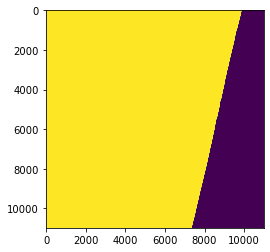

In [ ]:
plt.imshow(band[0])

In [18]:
meta

{'driver': 'ENVI',
 'dtype': 'uint16',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 7,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

In [1]:
from tifffile import tifffile

In [3]:
img = tifffile.imread('N:/dataorg-datasets/sentinel2_images/images_danya/geotiff/L2A_T43SFR_A023740_20200108T054215.tiff')

TiffFileError: not a TIFF file

### Generate .geojson file

In [19]:
import geojson

In [20]:
point = geojson.Point((-115.81, 37.24))

features = []
features.append(geojson.Feature(geometry=point, properties={"country": "Spain"}))

# add more features...
# features.append(...)

feature_collection = geojson.FeatureCollection(features)

with open('myfile.geojson', 'w') as f:
    geojson.dump(feature_collection, f)

In [21]:
feature_collection

{"features": [{"geometry": {"coordinates": [-115.81, 37.24], "type": "Point"}, "properties": {"country": "Spain"}, "type": "Feature"}], "type": "FeatureCollection"}

In [25]:
polygon = geojson.Polygon([[(2.38, 57.322), (23.194, -20.28), (-120.43, 19.15), (2.38,   57.322)]])
features = []
features.append(geojson.Feature(geometry=polygon, properties={"tile": "43SFR"}))
feature_collection = geojson.FeatureCollection(features)
feature_collection


{"features": [{"geometry": {"coordinates": [[[2.38, 57.322], [23.194, -20.28], [-120.43, 19.15], [2.38, 57.322]]], "type": "Polygon"}, "properties": {"tile": "43SFR"}, "type": "Feature"}], "type": "FeatureCollection"}

### Others

Download data using wget

In [1]:
import os

In [4]:
url1 = "https://scihub.copernicus.eu/dhus/odata/v1/Products('22e7af63-07ad-4076-8541-f6655388dc5e')/\$value"

In [6]:
url2 = "https://scihub.copernicus.eu/dhus/odata/v1/Products('2b17b57d-fff4-4645-b539-91f305c27c69')/$value"

In [5]:
url3 = "https://scihub.copernicus.eu/dhus/odata/v1/Products('2aa207f9-608c-4548-b992-2c47bcd5793c')/$value"

In [6]:
os.system(f'wget  --content-disposition --continue --user=danyayay --password=Ldy19970722 "{url3}"')

0

In [ ]:
https://scihub.copernicus.eu/dhus/odata/v1/Products('2aa207f9-608c-4548-b992-2c47bcd5793c')</id><title type="text">S2A_MSIL2A_20201220T053231_N0214_R105_T43SFR_20201220T075655</title><updated>2021-07-23T19:19:53.987Z</updated><category term="DHuS.Product" scheme="http://schemas.microsoft.com/ado/2007/08/dataservices/scheme"/><link href="Products(&apos;2aa207f9-608c-4548-b992-2c47bcd5793c&apos;)" rel="edit" title="Product"/>

In [ ]:
https://scihub.copernicus.eu/dhus/odata/v1/Products('2c50ca48-661e-4163-ba0a-902c4811cf09')/Online/$value

In [ ]:
https://scihub.copernicus.eu/dhus/odata/v1/Products('2c50ca48-661e-4163-ba0a-902c4811cf09')/$value

In [ ]:
https://scihub.copernicus.eu/dhus/odata/v1/Products('2c50ca48-661e-4163-ba0a-902c4811cf09')/Nodes('S2A_MSIL1C_20200603T052651_N0209_R105_T43SFR_20200603T091952.SAFE')/Nodes('manifest.safe')/$value

In [ ]:
https://scihub.copernicus.eu/dhus/odata/v1/Products('0a91217c-c602-471c-bda1-4926af39840f')/Nodes('S2A_MSIL1C_20210509T052651_N0300_R105_T43SFR_20210509T074019.SAFE')/Nodes('GRANULE')/$value

good

In [ ]:
https://scihub.copernicus.eu/dhus/odata/v1/Products('2b17b57d-fff4-4645-b539-91f305c27c69')/Nodes('S1A_IW_SLC__1SDV_20160117T103451_20160117T103518_009533_00DD94_D46A.SAFE')/Nodes('manifest.safe')/$value

In [ ]:
https://scihub.copernicus.eu/dhus/odata/v1/Products('ac8b1986-73e7-4ed2-b21a-8cfefead7e7b')/$value

In [ ]:
https://scihub.copernicus.eu/dhus/odata/v1/Products('ac8b1986-73e7-4ed2-b21a-8cfefead7e7b')/Nodes('S2A_MSIL1C_20210601T053641_N0300_R005_T43SFR_20210601T074909.SAFE')/Nodes('manifest.safe')/$value

In [ ]:
https://scihub.copernicus.eu/dhus/odata/v1/Products('8bd3bef3-6a11-4111-ba87-fd3004ed47fd')/Nodes('S2B_MSIL2A_20210523T210019_N0300_R100_T07WDQ_20210523T234058.SAFE')/Nodes('manifest.safe')/$value

Download using urllib

In [7]:
import urllib

In [9]:
# create a password manager
password_mgr = urllib.request.HTTPPasswordMgrWithDefaultRealm()

# Add the username and password.
# If we knew the realm, we could use it instead of None.
top_level_url = "https://scihub.copernicus.eu"
password_mgr.add_password(None, top_level_url, 'danyayay', 'Ldy19970722')

handler = urllib.request.HTTPBasicAuthHandler(password_mgr)

# create "opener" (OpenerDirector instance)
opener = urllib.request.build_opener(handler)

# use the opener to fetch a URL
a_url = top_level_url + "/dhus/odata/v1/Products('16241b12-cce4-4bf4-8e55-5a790134a1d0')/$value"
opener.open(a_url)

# Install the opener.
# Now all calls to urllib.request.urlopen use our opener.
urllib.request.install_opener(opener)

In [10]:
import requests

In [11]:
theurl= 'https://scihub.copernicus.eu/dhus/odata/v1/Products('16241b12-cce4-4bf4-8e55-5a790134a1d0')/$value'
username = 'myUsername'
password = 'myPassword'

r=requests.get(theurl, auth=requests.auth.HTTPBasicAuth(username, password))

MissingSchema: Invalid URL 'myLink_queriedResult/result.xls': No schema supplied. Perhaps you meant http://myLink_queriedResult/result.xls?

### Data processing

In [5]:
import numpy as np
import rasterio
import skimage

In [8]:
def load_geotiff(path, window=None):
    """ Load the geotiff as a list of numpy array.
        INPUT : path (str) -> the path to the geotiff
                window (raterio.windows.Window) -> the window to use when loading the image
        OUTPUT : band (list of numpy array) -> the different bands as float scalled to 0:1
                 meta (dictionnary) -> the metadata associated with the geotiff
    """
    with rasterio.open(path) as f:
        band = [skimage.img_as_float(f.read(i+1, window=window)) for i in range(f.count)]
        meta = f.meta
        if window != None:
            meta['height'] = window.height
            meta['width'] = window.width
            meta['transform'] = f.window_transform(window)
    return band, meta

In [3]:
path_geotiff = 'N:/dataorg-datasets/sentinel2_images/images_danya/geotiff/'

In [5]:
file1_path = path_geotiff + 'L2A_T43SFR_A023697_20200105T053922.tiff'

In [6]:
img1_bands, img1_meta = load_geotiff(file1_path)

In [9]:
len(img1_bands)

7

In [10]:
img1_bands[0].shape

(10980, 10980)

In [11]:
img1_meta

{'driver': 'ENVI',
 'dtype': 'uint16',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 7,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

In [12]:
img1_np = np.stack(img1_bands, axis=2)

In [14]:
img1_np.shape

(10980, 10980, 7)

In [6]:
def calculate_ndvi(red, nir):
    """ Compute the NDVI
        INPUT : red (np.array) -> the Red band images as a numpy array of float
                nir (np.array) -> the Near Infrared images as a numpy array of float
        OUTPUT : ndvi (np.array) -> the NDVI
    """
    ndvi = (nir - red) / (nir + red + 1e-12)
    return ndvi


# def calculate_ndre(red_edge, nir):
#     ndre = (nir - red_edge) / (nir + red_edge + 1e-12)
#     return ndre


def calculate_gndvi(green, nir):
    gndvi = (nir - green) / (nir + green + 1e-12)
    return gndvi


def calculate_evi(green, red, blue, nir):
    evi = 2.5 * (nir - red) / (nir + 6 * red - 7.5 * blue + 1)
    return evi


def calculate_cvi(green, red, nir):
    cvi = nir * red / (green + 1e-12)**2
    return cvi

In [7]:
def preprocessing(img, add_features=['ndvi', 'gndvi']):
    """
    band02 = blue --> idx = 0
    band03 = green --> idx = 1
    band04 = red --> idx = 2
    band08 = nir --> idx = 3
    """
    new_bands = []

    # select specific bands
    img = img[:, :, [1, 2, 3, 4]]

    # add feature
    for feature in add_features:
        if feature == 'ndvi':
            new_bands.append(calculate_ndvi(img[:, :, 2], img[:, :, 3]))
        elif feature == 'gndvi':
            new_bands.append(calculate_gndvi(img[:, :, 1], img[:, :, 3]))
        elif feature == 'evi':
            new_bands.append(calculate_evi(img[:, :, 1], img[:, :, 2], 
                                           img[:, :, 0], img[:, :, 3]))
        elif feature == 'cvi':
            new_bands.append(calculate_cvi(img[:, :, 1], img[:, :, 2], img[:, :, 3]))

    return np.append(img, np.stack(new_bands, axis=2), axis=2)

In [21]:
add_features=['ndvi', 'gndvi']

In [19]:
img_train = preprocessing(img1_np, add_features)

In [20]:
img_train.shape

(10980, 10980, 6)

In [22]:
img_meta = img1_meta

#### visualize new features

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import rasterio.plot as rioplot

In [23]:
# plot img and shapefile
def show_image(img, transform, ax=None, band_idx=[0], shp_dict={'linewidth':1, 'facecolor':(0,0,0,0), 'edgecolor':'black'}, cmap='Greys'):
    """  """
    if len(img.shape) == 3:
        rioplot.show(rioplot.reshape_as_raster(img[:,:,band_idx]), transform=transform, ax=ax, cmap=cmap)
    elif len(img.shape) == 2:
        rioplot.show(img, transform=transform, ax=ax, cmap=cmap)
    else:
        raise 'Wrong image dimension. Must be HxW or HxWxB'
#     for p in polygons:
#         ax.add_patch(matplotlib.patches.Polygon(p, **shp_dict))

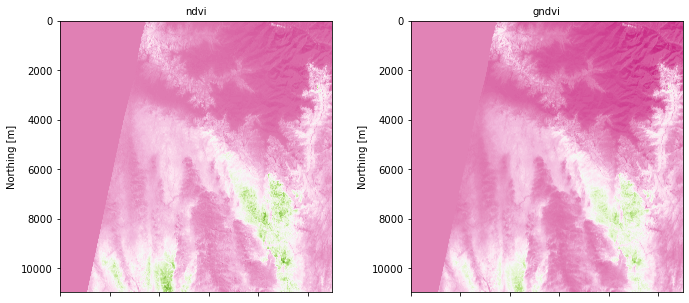

In [31]:
nb_fig = img_train.shape[2] - 4
fig, axs = plt.subplots(1, 2, figsize=(12,5), gridspec_kw={'hspace':0.1, 'wspace':0.1})
for i, f in enumerate(add_features):
    show_image(img_train[:, :, 4+i], img_meta['transform'], ax=axs[i], cmap='PiYG')
    axs[i].set_title(f, fontsize=10)
    axs[i].set_ylabel('Northing [m]')
    axs[i].set_xticklabels([])

In [32]:
img_train[4].mean()

0.06671168241253544

In [33]:
img_train[5].mean()

0.06667350628738468

#### Split raster

In [1]:
import os

In [2]:
from osgeo import gdal

In [131]:
in_path = 'N:/dataorg-datasets/MLsatellite/sentinel2_images/images_danya/geotiff/'
input_filename = 'L2A_T43SFR_A023697_20200105T053922.tiff'

out_path = 'N:/dataorg-datasets/MLsatellite/sentinel2_images/images_danya/patches/'
output_filename = 'L2A_T43SFR_A023697_20200105T053922_'

tile_size_x = 1000
tile_size_y = 1000

In [37]:
ds = gdal.Open(in_path + input_filename)
band = ds.GetRasterBand(1)
xsize = band.XSize
ysize = band.YSize

for i in range(0, xsize, tile_size_x):
    for j in range(0, ysize, tile_size_y):
        com_string = "gdal_translate -of GTIFF -srcwin " + str(i)+ ", " + str(j) + ", " + str(tile_size_x) + ", " + str(tile_size_y) + " " + str(in_path) + str(input_filename) + " " + str(out_path) + str(output_filename) + str(i) + "_" + str(j) + ".tif"
        os.system(com_string)

In [132]:
# input image 
input_img_band, input_img_meta = load_geotiff(in_path + input_filename)
input_img = np.stack(input_img_band, axis=2)

C:\Users\lida\Anaconda3\envs\ml4sat\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [133]:
input_img.shape

(10980, 10980, 7)

In [40]:
input_img[0].mean()

0.06529245892824607

In [14]:
import rasterio, skimage
import numpy as np

In [66]:
# patch image 
patch_path = 'N:/dataorg-datasets/MLsatellite/sentinel2_images/images_danya/patches/'
patch_filename = 'L2A_T43SFR_A023697_20200105T053922_8000_9000.tif'
patch_img_band, patch_img_meta = load_geotiff(patch_path + patch_filename)
patch_img = np.stack(patch_img_band, axis=2)

In [67]:
patch_img.shape

(1000, 1000, 7)

In [68]:
for i in range(patch_img.shape[2]):
    print(patch_img[i].mean())

0.017272430217223075
0.017254886701762416
0.017221715768019268
0.01716851191838603
0.017149932969296663
0.017187376429170887
0.017204438195511665


In [69]:
patch_img[:,:,[3,2,1]].shape

(1000, 1000, 3)

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [168]:
def show_true_color(raster):
    # Normalize bands into 0.0 - 1.0 scale
    def normalize(array):
        array_min, array_max = array.min(), array.max()
        return (array - array_min) / (array_max - array_min + 1e-6)

    # Convert to numpy arrays
    blue = raster.read(2)
    green = raster.read(3)
    red = raster.read(4)

    # Normalize band DN
    blue_norm = normalize(blue)
    green_norm = normalize(green)
    red_norm = normalize(red)

    # Stack bands
    img_rgb = np.dstack((red_norm, green_norm, blue_norm))

    # View the color composite
    fig = plt.subplots(figsize=(6,6))
    plt.imshow(img_rgb)

    
def read_n_show_true_color(raster_filename):
    raster = rasterio.open(raster_filename)
    show_true_color(raster)
    

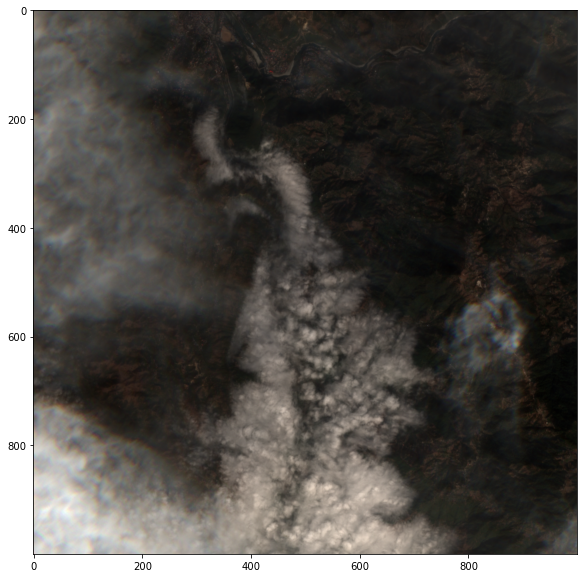

In [71]:
# real data 

# Open the file:
raster = rasterio.open(patch_path + patch_filename)

# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Convert to numpy arrays
blue = raster.read(2)
green = raster.read(3)
red = raster.read(4)
nir = raster.read(5)

# Normalize band DN
blue_norm = normalize(blue)
green_norm = normalize(green)
red_norm = normalize(red)
nir_norm = normalize(nir)

# Stack bands
patch_img_rgb = np.dstack((red_norm, green_norm, blue_norm))

# View the color composite
fig = plt.subplots(figsize=(10,10))
plt.imshow(patch_img_rgb)
plt.savefig('patch_img_rgb.png')

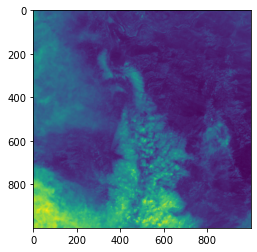

In [72]:
plt.imshow(red_norm)

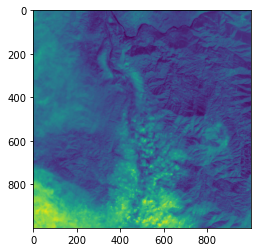

In [73]:
plt.imshow(nir_norm)

In [55]:
# Open the file:
raster = rasterio.open(in_path + input_filename)

# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Convert to numpy arrays
blue = raster.read(2)
green = raster.read(3)
red = raster.read(4)

# Normalize band DN
blue_norm = normalize(blue)
green_norm = normalize(green)
red_norm = normalize(red)

# Stack bands
input_img_rgb = np.dstack((red_norm, green_norm, blue_norm))

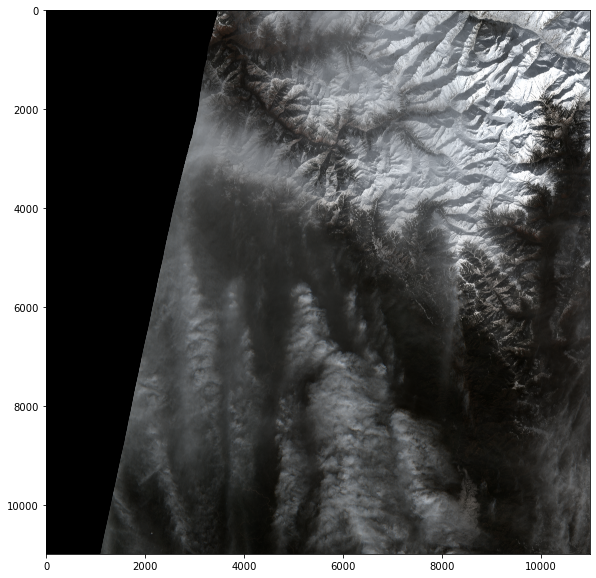

In [56]:
# View the color composite
fig = plt.subplots(figsize=(10,10))
plt.imshow(input_img_rgb)
plt.savefig('input_img_rgb.png')

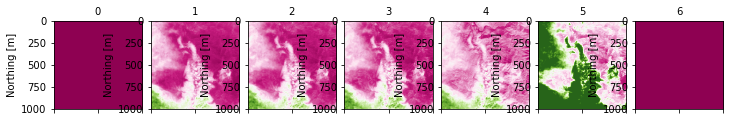

In [74]:
fig, axs = plt.subplots(1, 7, figsize=(12,5), gridspec_kw={'hspace':0.1, 'wspace':0.1})
for i, f in enumerate(range(7)):
    show_image(patch_img[:, :, f], patch_img_meta['transform'], ax=axs[i], cmap='PiYG')
    axs[i].set_title(f, fontsize=10)
    axs[i].set_ylabel('Northing [m]')
    axs[i].set_xticklabels([])

#### K-means 

In [76]:
# add ndvi
patch_processed = preprocessing(patch_img, ['ndvi'])

In [77]:
patch_processed.shape

(1000, 1000, 5)

In [79]:
from sklearn.cluster import KMeans

In [92]:
from skimage.color import label2rgb

In [120]:
## using 4 bands + ndvi, k=2
def cluster(x, k=3):
    # x
    patch_x = x.reshape(-1, x.shape[-1])
    # fit 
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(patch_x)
    # y
    patch_y_pred = kmeans.labels_
    patch_y_pred = patch_y_pred.reshape(x.shape[0], x.shape[1])
    # draw image 
    out = label2rgb(patch_y_pred)
    print(f"x.shape {patch_x.shape}, y_pred.shape {patch_y_pred.shape}, num_cluster {k}")
    return out

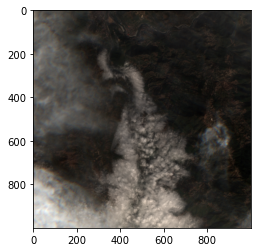

In [101]:
# original image
plt.imshow(patch_img_rgb)

x.shape (1000000, 5), y_pred.shape (1000, 1000), num_cluster 4


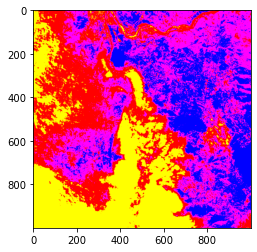

In [122]:
# 4 bands + ndvi, k = 4
out_4_5 = cluster(patch_processed, 4)
plt.imshow(out_4_5)

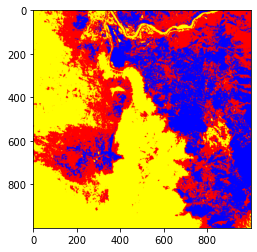

In [99]:
# 4 bands + ndvi, k = 3
out_3_5 = cluster(patch_processed, 3)
plt.imshow(out_3_5)

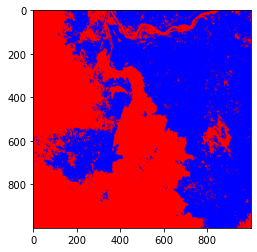

In [112]:
# 4 bands + ndvi, k = 2
out_2_5 = cluster(patch_processed, 2)
plt.imshow(out_2_5)

x.shape (1000000, 7), y_pred.shape (1000, 1000), num_cluster 3


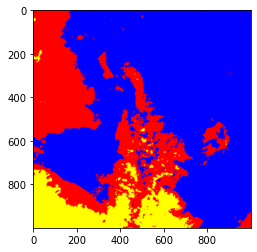

In [121]:
# 4 bands, k = 3
out_3_4 = cluster(patch_img, 3)
plt.imshow(out_3_4)

x.shape (1000000, 1), y_pred.shape (1000, 1000), num_cluster 3


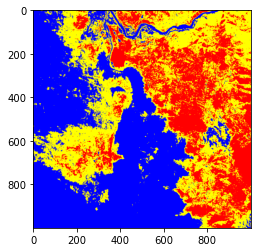

In [128]:
# ndvi, k = 3
out_1_3 = cluster(patch_processed[:,:,[-1]], 3)
plt.imshow(out_1_3)

x.shape (1000000, 1), y_pred.shape (1000, 1000), num_cluster 4


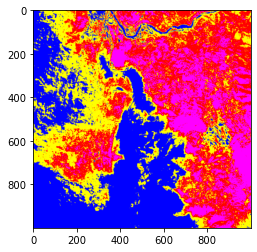

In [129]:
# ndvi, k = 3
out_1_4 = cluster(patch_processed[:,:,[-1]], 4)
plt.imshow(out_1_4)

For the whole tile 

In [134]:
tile_processed = preprocessing(input_img, ['ndvi'])
tile_processed.shape

(10980, 10980, 5)

In [136]:
# ndvi, k = 3
out_1_3 = cluster(study_processed[:,:,[-1]], 3)


KeyboardInterrupt



In [ ]:
plt.imshow(out_1_3)

## Clip imagery

#### check .crs consistency

In [138]:
import geopandas as gpd

In [139]:
def read_shp(shp_name):
    return gpd.read_file(shp_name)

In [147]:
study_area = read_shp('../data/study_area/study_area.shp')

In [148]:
study_area

,id,geometry
0,1,"POLYGON ((77.17355 32.23500, 77.20571 32.25445..."


In [152]:
study_area.geometry

0    POLYGON ((77.17355 32.23500, 77.20571 32.25445...
Name: geometry, dtype: geometry

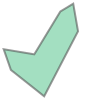

In [193]:
study_area.geometry[0]

In [150]:
study_area.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [157]:
imagery = rasterio.open(in_path + input_filename)

C:\Users\lida\Anaconda3\envs\ml4sat\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [159]:
imagery.crs

In [160]:
input_img_meta['crs']

**Raster doesn't have crs info. So can't check the projection consistency.**

In [162]:
from rasterio.mask import mask

In [172]:
# Read Shape file
with fiona.open('../data/study_area/study_area.shp', "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

# read imagery file
with rasterio.open(in_path + input_filename) as src:
    print(src.shape)
    out_image, out_transform = mask(src, shapes, crop=True)
    out_meta = src.meta

# Save clipped imagery
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open("clipped.tif", "w", **out_meta) as dest:
    dest.write(out_image)

(10980, 10980)


In [184]:
src = rasterio.open(in_path + input_filename)

In [190]:
src.crs

In [182]:
shapes

[{'type': 'Polygon',
  'coordinates': [[(77.17354986483703, 32.23499856798152),
    (77.20571345086518, 32.25444631767296),
    (77.21768129682913, 32.18563120338019),
    (77.13315838470866, 32.02331729249398),
    (77.05013145333369, 32.08914044529576),
    (77.03217968438776, 32.14075178101534),
    (77.108474702408, 32.12803594467863),
    (77.17354986483703, 32.23499856798152)]]}]

In [181]:
in_path + input_filename

'N:/dataorg-datasets/MLsatellite/sentinel2_images/images_danya/geotiff/L2A_T43SFR_A023697_20200105T053922.tiff'

In [171]:
out_image

array([[[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]]], dtype=uint16)

C:\Users\lida\AppData\Local\Temp/ipykernel_18688/1772768800.py:5: RuntimeWarning: invalid value encountered in true_divide
  return (array - array_min) / (array_max - array_min)


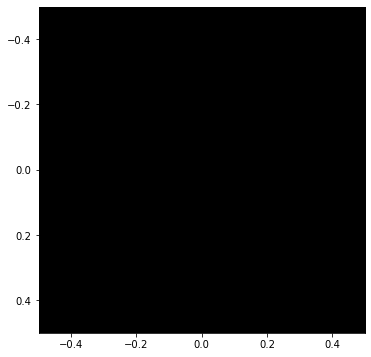

In [166]:
read_n_show_true_color('clipped.tif')

Another image

In [197]:
another_path = 'N:/dataorg-datasets/MLsatellite/sentinel2_images/images_danya/corrected/S2A_MSIL2A_20200105T053221_N9999_R105_T43SFR_20210819T112746.SAFE/GRANULE/L2A_T43SFR_A023697_20200105T053922/IMG_DATA/R10m/T43SFR_20200105T053221_B02_10m.tif'

In [198]:
another_src = rasterio.open(another_path)

C:\Users\lida\Anaconda3\envs\ml4sat\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [200]:
another_src.crs

Another one again

In [201]:
another_path = 'N:/dataorg-datasets/MLsatellite/sentinel2_images/images_danya/safe/S2A_MSIL1C_20200105T053221_N0208_R105_T43SFR_20200105T072254.SAFE/GRANULE/L1C_T43SFR_A023697_20200105T053922/IMG_DATA/T43SFR_20200105T053221_B02.jp2'

In [202]:
another_src = rasterio.open(another_path)

In [203]:
another_src.crs

CRS.from_epsg(32643)

In [207]:
another_tiff = load_geotiff(another_path)

In [209]:
another_tiff[1]

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint16',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 1,
 'crs': CRS.from_epsg(32643),
 'transform': Affine(10.0, 0.0, 600000.0,
        0.0, -10.0, 3600000.0)}

***Now having different projection system***

In [204]:
mask(another_src, shapes, crop=True)

ValueError: Input shapes do not overlap raster.

#### reproject

In [211]:
import fiona
import rasterio
import rasterio.mask
from rasterio.plot import show
from rasterio.warp import calculate_default_transform, reproject, Resampling

import geopandas as gpd

import numpy as np

In [212]:
# Specify output projection system
dst_crs = 'EPSG:4326'

# Input imagery file name before transformation
input_imagery_file = another_path
# Save output imagery file name after transformation
transformed_imagery_file = './transformed.jp2'

with rasterio.open(input_imagery_file) as imagery:
    transform, width, height = calculate_default_transform(imagery.crs, dst_crs, imagery.width, imagery.height, *imagery.bounds)
    kwargs = imagery.meta.copy()
    kwargs.update({'crs': dst_crs, 'transform': transform, 'width': width, 'height': height})
    with rasterio.open(transformed_imagery_file, 'w', **kwargs) as dst:
        for i in range(1, imagery.count + 1):
            reproject(
                source=rasterio.band(imagery, i),
                destination=rasterio.band(dst, i),
                src_transform=imagery.transform,
                src_crs=imagery.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

In [213]:
reprojected_src = rasterio.open('./transformed.jp2')

In [214]:
reprojected_src.crs

CRS.from_epsg(4326)

#### clip now

In [217]:
masked = mask(reprojected_src, shapes, crop=True)

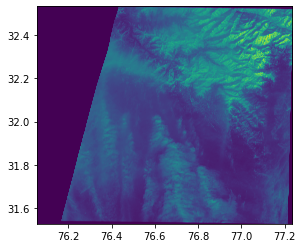

<AxesSubplot:>

In [216]:
show(reprojected_src)

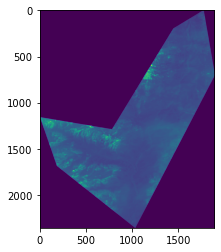

<AxesSubplot:>

In [221]:
show(masked[0])

## cloud mask

In [222]:
gml_path = 'N:/dataorg-datasets/MLsatellite/sentinel2_images/images_danya/corrected/S2A_MSIL2A_20200105T053221_N9999_R105_T43SFR_20210819T112746.SAFE/GRANULE/L2A_T43SFR_A023697_20200105T053922/QI_DATA/MSK_CLOUDS_B00.gml'

In [223]:
gml_ds = gdal.Open(gml_path, gdal.GA_ReadOnly)

In [225]:
gml_ds

#### load target

In [145]:
import rasterio
import numpy as np
import pandas as pd
import skimage
import fiona
import pyproj
import glob

In [143]:
labels = read_shp('../data/survey-polygons/survey20210716_polygons20210819.shp')

In [144]:
labels

,id,region,geometry
0,1,Shimla,"POLYGON ((77.78505 31.14080, 77.78498 31.14099..."
1,1,Kullu,"POLYGON ((77.12878 32.05505, 77.12891 32.05526..."
2,1,Kullu,"POLYGON ((77.12814 32.05329, 77.12858 32.05315..."
3,1,Kullu,"POLYGON ((77.12329 32.09353, 77.12294 32.09258..."
4,1,Kullu,"POLYGON ((77.12360 32.09328, 77.12374 32.09321..."
5,1,Kullu,"POLYGON ((77.12452 32.09245, 77.12481 32.09236..."
6,1,Kullu,"POLYGON ((77.12415 32.09216, 77.12378 32.09238..."
7,1,Kullu,"POLYGON ((77.12364 32.09188, 77.12397 32.09178..."
8,1,Kullu,"POLYGON ((77.12409 32.09176, 77.12488 32.09154..."
9,1,Kullu,"POLYGON ((77.12439 32.09124, 77.12467 32.09113..."


In [146]:
def load_target_shp(path, transform=None, projection=None):
    """ Load the shapefile as a list of numpy array of coordinates
        INPUT : path (str) -> the path to the shapefile
                transform (rasterio.Affine) -> the affine transformation to get the polygon in row;col format from UTM.
        OUTPUT : poly (list of np.array) -> list of polygons (as numpy.array of coordinates)
                 poly_rc (list of np.array) -> list of polygon in row-col format if a transform is given
    """
    with fiona.open(path) as shapefile:
        proj_in = pyproj.Proj(shapefile.crs)
        class_type = [feature['properties']['id']+1 for feature in shapefile]
        features = [feature["geometry"] for feature in shapefile]
    # reproject polygons if necessary
    if projection is None:
        poly = [np.array([(coord[0], coord[1]) for coord in features[i]['coordinates'][0]]) for i in range(len(features))]
    else:
        poly = [np.array([pyproj.transform(proj_in, projection, coord[0], coord[1]) for coord in features[i]['coordinates'][0]]) for i in range(len(features))]
    poly_rc = None

    # transform in row-col if a transform is given
    if not transform is None:
        poly_rc = [np.array([rasterio.transform.rowcol(transform, coord[0], coord[1])[::-1] for coord in p]) for p in poly]

    return poly, poly_rc, class_type

In [ ]:
polygons_train, polygons_rc_train, class_list = \
    load_target_shp(path_shp+label_path_train, 
                    transform=meta_train['transform'], 
                    projection=pyproj.Proj(meta_train['crs']))